In [2]:
import numpy as np
import os
import pandas as pd
import gc
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict, KFold, train_test_split
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
import random
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
pastENEM = 'Enem/DataSet/Data/'
pastENADE = 'Enade/DataSet/Data/'
pastVar = 'Enade/DataSet/Dicionarios/Variaveis/'

In [4]:
dff_Enade = {}
dff_Enem = {}

In [121]:
ano_inicio = 1998
ano_fim = 2019

for ano in range(ano_inicio, ano_fim + 1):
    temp = pd.DataFrame()
    for chunk in pd.read_csv(pastENEM + 'MICRODADOS_ENEM_' + str(ano) + '.csv', encoding = 'Latin1', 
                             delimiter = ';', chunksize=300000,  low_memory = False):
        temp = pd.concat([temp, chunk], ignore_index=True)
        temp = temp.dropna()
        
        #temp['CO_UF'] = temp['COD_MUN_RESID'].apply(str).str.slice(0,2)
        #temp.to_csv(pastENEM + '/MICRODADOS_ENEM_' + str(ano) + '.csv', index = False, sep = ';', encoding = 'Latin1')
        del chunk; gc.collect()
    dff_Enem.update({ano: temp})
    del temp; gc.collect()
    print(str(ano) + ' Terminado')

1998 Terminado
1999 Terminado
2000 Terminado
2001 Terminado
2002 Terminado
2003 Terminado
2004 Terminado
2005 Terminado
2006 Terminado
2007 Terminado
2008 Terminado
2009 Terminado
2010 Terminado
2011 Terminado
2012 Terminado
2013 Terminado
2014 Terminado
2015 Terminado
2016 Terminado
2017 Terminado
2018 Terminado
2019 Terminado


In [ ]:
ano_inicio = 2004
ano_fim = 2019

for ano in range(ano_inicio, ano_fim + 1):
    temp = pd.DataFrame()
    for chunk in pd.read_csv(pastENADE + 'MICRODADOS_ENADE_' + str(ano) + '.csv', encoding = 'Latin1', 
                             delimiter = ';', chunksize=300000,  low_memory = False):
        temp = pd.concat([temp, chunk], ignore_index=True)
        temp = temp.dropna()
        
        #temp['CO_UF'] = temp['COD_MUN_RESID'].apply(str).str.slice(0,2)
        #temp.to_csv(pastENEM + '/MICRODADOS_ENEM_' + str(ano) + '.csv', index = False, sep = ';', encoding = 'Latin1')
        del chunk; gc.collect()
    dff_Enade.update({ano: temp})
    del temp; gc.collect()
    print(str(ano) + ' Terminado')

In [133]:
ano_inicio = 2011
ano_fim = 2019
for ano in range(ano_inicio, ano_fim + 1):
    dff_Enem[ano]['CO_UF'] = dff_Enem[ano]['COD_MUN_RES'].apply(str).str.slice(0,2)
    print(ano)

2011
2012
2013
2014
2015
2016
2017
2018
2019


In [135]:
dff_Enem[2011]

,COD_MUN_RES,OB_NT_CN,OB_NT_CH,OB_NT_LC,OB_NT_MT,RD_NT_COMP1,RD_NT_COMP2,RD_NT_COMP3,RD_NT_COMP4,RD_NT_COMP5,NU_IDADE,CO_UF
0,3548708,577.10,576.00,575.50,737.10,140.0,140.0,140.0,140.0,60.0,28,35
1,4125506,.,.,.,.,0.0,0.0,0.0,0.0,0.0,22,41
2,4314902,491.40,435.30,491.60,467.80,140.0,60.0,100.0,140.0,100.0,33,43
3,3300456,424.40,422.40,360.80,406.70,100.0,100.0,100.0,80.0,40.0,24,33
4,2304400,648.80,583.20,571.50,769.30,120.0,120.0,100.0,100.0,60.0,25,23
...,...,...,...,...,...,...,...,...,...,...,...,...
299995,3548906,449.00,492.20,492.90,477.80,100.0,140.0,120.0,120.0,80.0,18,35
299996,3170206,565.30,612.00,612.10,539.80,160.0,120.0,120.0,120.0,80.0,19,31
299997,1302603,422.20,434.70,501.90,407.00,140.0,160.0,100.0,80.0,100.0,24,13
299998,3547809,489.60,455.20,542.60,496.20,160.0,200.0,160.0,160.0,120.0,17,35


In [ ]:
ano_inicio = 1998
ano_fim = 2019
for ano in range(ano_inicio, ano_fim + 1):
    #cola = df[ano].columns.values
    #coln = [p.upper() for p in cola]
    #dff.update({ano: df[ano].rename(columns={cola[i] : coln[i] for i in range(0,len(coln))}, inplace = False)})
    dff_Enem[ano].to_csv(pastENEM + 'MICRODADOS_ENEM_' + str(ano) + '.csv', index = False, sep = ';', encoding = 'Latin1')
    print(ano)

1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


In [112]:
amostras = 10000
df = []

ano_inicio = 1998
ano_fim = 2008


coln = ['COD_MUN_RESID', 'OB_NT_C1', 'OB_NT_C2','OB_NT_C3', 'OB_NT_C4', 'OB_NT_C5',
        'RD_NT_C1', 'RD_NT_C2', 'RD_NT_C3', 'RD_NT_C4', 'RD_NT_C5']

colob = ['OB_NT_C1', 'OB_NT_C2','OB_NT_C3', 'OB_NT_C4', 'OB_NT_C5']
colre = ['RD_NT_C1', 'RD_NT_C2', 'RD_NT_C3', 'RD_NT_C4', 'RD_NT_C5']

cols = ['CO_UF', 'ANO', 'NU_OB', 'NU_RE', 'RAZAO']

for ano in range(ano_inicio, ano_fim + 1):
    
    temp = pd.DataFrame()
    temp = dff_Enem[ano].copy()
    ran = np.random.randint(0,temp.shape[0], amostras)
    temp = temp.reset_index(drop = True)
    temp = temp.loc[ran]
    
    temp = temp.reset_index(drop = True)
    
    col = temp.columns.values
    temp = temp[col]
    temp = temp.rename(columns={col[i] : coln[i] for i in range(0,len(coln))}, inplace = False)
    
    col = temp.columns.values
    col = col[1:len(col)]
    for j in col:
        temp[j] = pd.to_numeric(temp[j], errors='coerce')
    
    media_global = temp[col].mean().sum()
    
    media_individual = temp[col].sum(axis = 1)
    temp['CO_UF'] = temp['COD_MUN_RESID'].apply(str).str.slice(0,2)
    temp['NU_OB'] = temp[colob].sum(axis = 1)
    temp['NU_RE'] = temp[colre].sum(axis = 1)
    temp['ANO'] = [ano]*temp.shape[0]
    temp['RAZAO'] = media_individual/media_global
    
    
    df.append(temp[cols])
    print(ano)

1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008


In [113]:
ano_inicio = 2008
ano_fim = 2019


coln = ['COD_MUN_RESID', 'OB_NT_C1', 'OB_NT_C2','OB_NT_C3', 'OB_NT_C4',
        'RD_NT_C1', 'RD_NT_C2', 'RD_NT_C3', 'RD_NT_C4', 'RD_NT_C5']

colob = ['OB_NT_C1', 'OB_NT_C2','OB_NT_C3', 'OB_NT_C4']
colre = ['RD_NT_C1', 'RD_NT_C2', 'RD_NT_C3', 'RD_NT_C4', 'RD_NT_C5']

cols = ['CO_UF', 'ANO', 'NU_OB', 'NU_RE', 'RAZAO']

for ano in range(ano_inicio, ano_fim + 1):
   
    temp = pd.DataFrame()
    temp = dff_Enem[ano].copy()
    ran = np.random.randint(0,temp.shape[0], amostras)
    temp = temp.reset_index(drop = True)
    temp = temp.loc[ran]
    
    temp = temp.reset_index(drop = True)
    col = temp.columns.values
    temp = temp[col]
    temp = temp.rename(columns={col[i] : coln[i] for i in range(0,len(coln))}, inplace = False)
    
    col = temp.columns.values
    col = col[1:len(col)]
    for j in col:
        temp[j] = pd.to_numeric(temp[j], errors='coerce')
    
    media_global = temp[col].mean().sum()
    media_individual = temp[col].sum(axis = 1)
    
    
        
    temp['CO_UF'] = temp['COD_MUN_RESID'].apply(str).str.slice(0,2)
    temp['NU_OB'] = temp[colob].sum(axis = 1)
    temp['NU_RE'] = temp[colre].sum(axis = 1)
    temp['ANO'] = [ano]*temp.shape[0]
    temp['RAZAO'] = media_individual/media_global
    
    
    df.append(temp[cols])
    print(ano)

2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [118]:
df2  = pd.concat(df, ignore_index=True)
df3 = df2.copy()
df3['NU_OB'] = (df3['NU_OB'] - df3['NU_OB'].min())/(df3['NU_OB'].max() - df3['NU_OB'].min())

df3['NU_RE'] = (df3['NU_RE'] - df3['NU_RE'].min())/(df3['NU_RE'].max() - df3['NU_RE'].min())

In [119]:
x = pd.get_dummies(df3['CO_UF'])
X = df3.drop(columns = ['RAZAO', 'CO_UF'], axis = 1)
X =  pd.concat([x, X], axis = 1)
X = X.values
y = df3['RAZAO'].values
#label = X.columns()

In [120]:
norm = 'true'
n = 10
rs = 0
kf = KFold(n_splits=n)
r = []


In [121]:
result = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    result.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r.append([sum(result)/len(result)])

In [122]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    reg = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    result.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r.append([sum(result)/len(result)])

In [123]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    reg = RandomForestRegressor(max_depth=2, random_state=0).fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    result.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r.append([sum(result)/len(result)])

In [134]:
no_inicio = 1998
ano_fim = 2019

q_provas = []
for ano in range(1998, 2019 + 1):
    q_provas.append(dff_Enem[ano].shape[0])
    print(dff_Enem[ano].shape[0])

120958
307583
378305
1607230
1819160
1864218
1533718
2963953
3561437
3390525
3930741
2425600
3164852
300000
5791065
5007734
5947748
5604850
5818376
4426675
3893671
3701947


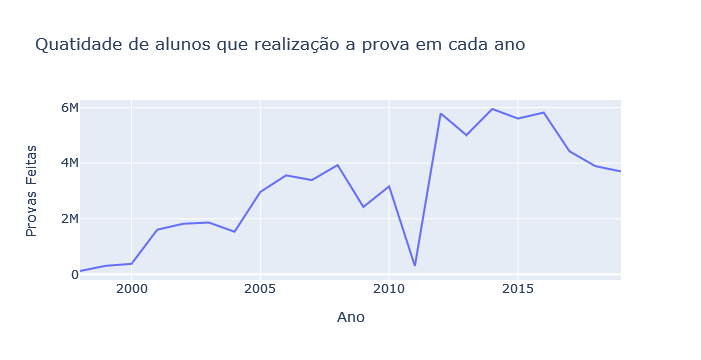

In [135]:


dd = pd.DataFrame(np.array([range(1998, 2019+1), q_provas]).T, columns = ['Ano', 'Provas Feitas'])


fig = px.line(dd, x = 'Ano', y = 'Provas Feitas', 
             title = 'Quatidade de alunos que realização a prova em cada ano')
fig.show()

fig.write_image("importancia.jpeg")
#plt.plot(ano_enem, q_provas)
#plt.title("Quatidade de alunos que realização a prova em cada ano")
#plt.xlabel('Ano')
#plt.ylabel('Quatidade de aluno que fizeram a prova')
#plt.savefig('PrecisaoSensibilidade.jpg')
#plt.show()


In [136]:
classificadores = ['Random Forest', 'MLP', 'Regressão Linear']
r 

[[1219486332.491531], [609743166.7162671], [406495444.5729817]]

In [138]:
rr = pd.DataFrame(np.array([classificadores, r]).T,  columns = ['Classificadores', 'EQM'])

print(rr.to_latex(index = False))

\begin{tabular}{ll}
\toprule
 Classificadores &                 EQM \\
\midrule
   Random Forest & [1219486332.491531] \\
             MLP & [609743166.7162671] \\
Regressão Linear & [406495444.5729817] \\
\bottomrule
\end{tabular}



C:\Users\leona\AppData\Local\Temp/ipykernel_24212/3722848120.py:1: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [ ]:
dff_Enem[1998].shape[0]

120958